
# Identify enriched gene sets associated with differentially spliced PTMs

As is commonly done for exon-centric analyses, we have provided the ability to perform gene set enrichment analysis for gene associated with spliced PTMs, using the EnrichR API from the gseapy module. By default, we include gene ontology terms, KEGG pathways, and Reactome pathways, but you can also provide your own gene sets listed in EnrichR.


In [1]:
from ptm_pose import analyze, helpers


# Load spliced ptm and altered flank data
spliced_ptms, altered_flanks = helpers.load_example_data()

/home/srcrowl/miniconda3/envs/pose_doc/lib/python3.12/site-packages/ptm_pose/pose_config.py:20: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ptm_coordinates = pd.read_csv(resource_dir + 'ptm_coordinates.csv', dtype = {'Chromosome/scaffold name': str, 'PTM Position in Isoform': int})


Use the below function, we can identify enriched gene sets associated with spliced ptms, altered flanks, or both. We can also specify the gene sets to assess, alpha value for significance, the minimum change in PSI value to consider, and whether to return only significant gene sets.



In [2]:
genesets = analyze.gene_set_enrichment(spliced_ptms, altered_flanks, alpha = 0.05, min_dPSI = 0.1, gene_sets = ['GO_Biological_Process_2023','Reactome_2022'], return_sig_only = True)
genesets.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Type,Genes with Differentially Included PTMs only,Genes with PTM with Altered Flanking Sequence only,Genes with Both
0,GO_Biological_Process_2023,Regulation Of Neurogenesis (GO:0050767),5/67,0.000008,0.007117,0,0,21.070671,248.290556,YAP1;APLP2;DOCK7;NUMB;NF2,Differentially Included + Altered Flanking Seq...,YAP1,NF2,DOCK7;NUMB;APLP2
1,GO_Biological_Process_2023,Protein Localization To Cell-Cell Junction (GO...,3/15,0.000028,0.013115,0,0,63.804487,668.624524,TJP1;LSR;SCRIB,Differentially Included + Altered Flanking Seq...,,LSR,TJP1;SCRIB
2,GO_Biological_Process_2023,Axon Development (GO:0061564),5/99,0.000051,0.015012,0,0,13.875280,137.122909,APLP2;DOCK7;BAIAP2;FGFR2;MARK2,Differentially Included + Altered Flanking Seq...,FGFR2,BAIAP2,DOCK7;MARK2;APLP2
3,GO_Biological_Process_2023,Regulation Of Cell Migration (GO:0030334),9/434,0.000064,0.015012,0,0,5.733529,55.334438,TJP1;CEACAM1;CSF1;ADAM15;LIMCH1;APLP2;NUMB;ITG...,Differentially Included + Altered Flanking Seq...,CSF1;ITGA6,NF2,NUMB;APLP2;CEACAM1;LIMCH1;ADAM15;TJP1
4,GO_Biological_Process_2023,Regulation Of Cell-Matrix Adhesion (GO:0001952),4/65,0.000140,0.025836,0,0,16.911220,150.057893,CSF1;ADAM15;LIMCH1;NF2,Differentially Included + Altered Flanking Seq...,CSF1,NF2,LIMCH1;ADAM15


You can then plot the enriched gene sets, including the proportion of genes associated with differentially included PTMs and those with altered flanking sequences. Here, let's restrict to looking at the top 5 enriched gene sets:



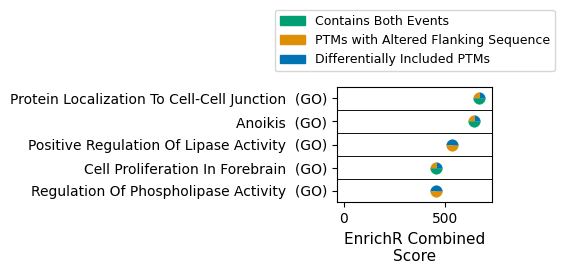

In [3]:
from ptm_pose import plots as pose_plots

pose_plots.plot_EnrichR_pies(genesets, top_terms = 5)